In [1]:
import pandas as pd 
import pathlib 
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [2]:
SOURCE_DIR = pathlib.Path("./reports")
bill_status_csv = list(SOURCE_DIR.glob("./pages/*bill_status.csv.gz"))
detailed_bill_status_csv = list(SOURCE_DIR.glob("./bills/*bill_status.csv.gz"))

In [3]:
frames = []
for path in bill_status_csv: 
    df = pd.read_csv(path)
    frames.append(df)
bills_df = pd.concat(frames)

In [4]:
bills_df.head(2)

,congress,house,bill_number,processed,subjects_present,subjects_processed,summaries_present,summaries_processed,textVersions_present,textVersions_processed,bill_texts_present,bill_texts_processed
0,102,s,3389,True,True,True,True,True,True,True,0,0
1,102,s,3371,True,True,True,True,True,True,True,0,0


In [5]:
bill_counts = bills_df.groupby(["congress", "house"]).agg(
    bill_count=("bill_number", "count"),
    processed_count=("processed", "sum"), 
    present_subjects=("subjects_present", "sum"), 
    processed_subjects=("subjects_processed", "sum"), 
    present_summaries=("summaries_present", "sum"), 
    processed_summaries=("summaries_processed", "sum"), 
    present_text=("textVersions_present", "sum"), 
    processed_text=("textVersions_processed", "sum"), 
    bill_texts_missing=("bill_texts_present", lambda x: (x == 0).sum()),
    bill_texts_present=("bill_texts_present", lambda x: (x >= 1).sum())
).reset_index()
bill_counts

,congress,house,bill_count,processed_count,present_subjects,processed_subjects,present_summaries,processed_summaries,present_text,processed_text,bill_texts_missing,bill_texts_present
0,100,hconres,398,398,398,398,398,398,0,0,398,0
1,100,hjres,678,678,678,678,678,678,98,98,678,0
2,100,hr,5585,5585,5585,5585,5585,5585,362,362,5585,0
3,100,hres,608,608,608,608,608,608,0,0,608,0
4,100,s,2924,2924,2924,2924,2924,2924,154,154,2924,0
...,...,...,...,...,...,...,...,...,...,...,...,...
147,118,hres,1627,1627,1618,1618,1420,1420,1627,1627,0,1627
148,118,s,5649,5649,5262,5262,3002,3002,5649,5649,1,5648
149,118,sconres,46,46,44,44,33,33,46,46,0,46
150,118,sjres,122,122,122,122,61,61,122,122,0,122


In [6]:
norm_bill_counts = bills_df.groupby(["congress"]).agg(
    bill_count=("bill_number", "count"),
    processed_norm=("processed", lambda x: x.sum() / len(x)),
    processed_subjects_norm=("subjects_processed", lambda x: x.sum() / len(x)),
    processed_summaries_norm=("summaries_processed", lambda x: x.sum() / len(x)),
    processed_text_versions_norm=("textVersions_processed", lambda x: x.sum() / len(x)),
    bill_texts_present_norm=("bill_texts_present", lambda x: (x >= 1).sum() / len(x))
).reset_index()

norm_bill_counts

,congress,bill_count,processed_norm,processed_subjects_norm,processed_summaries_norm,processed_text_versions_norm,bill_texts_present_norm
0,100,11278,1.0,1.000000,1.000000,0.067477,0.000000
1,101,11787,1.0,1.000000,1.000000,0.997964,0.000000
2,102,12016,1.0,1.000000,1.000000,0.999334,0.000000
3,103,9822,1.0,1.000000,1.000000,0.999898,0.000000
4,104,7991,1.0,1.000000,1.000000,0.999875,0.042172
5,105,9141,1.0,1.000000,1.000000,1.000000,0.044196
6,106,10840,1.0,1.000000,1.000000,0.999723,0.055627
7,107,10791,1.0,0.999815,0.999815,0.999815,0.056992
8,108,10669,1.0,0.999813,0.999813,0.999813,0.218390
9,109,13072,1.0,0.999694,0.999694,0.999618,0.824051


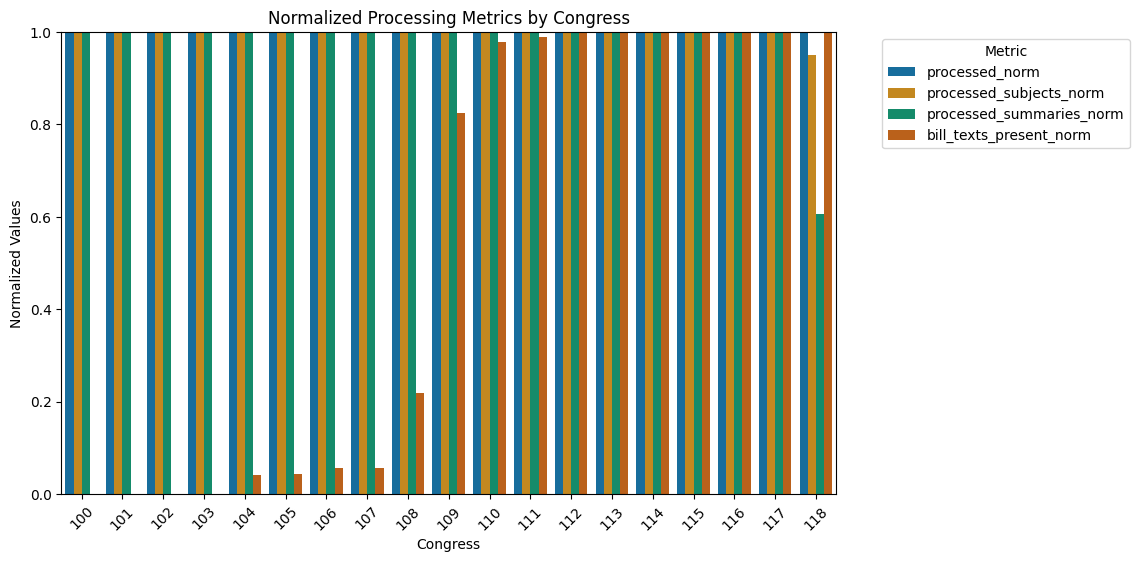

In [7]:
df = norm_bill_counts
plot_columns = ["processed_norm", "processed_subjects_norm", "processed_summaries_norm", "bill_texts_present_norm"]
# Melt the DataFrame to long format for Seaborn
df_melted = df.melt(id_vars=["congress"], 
                     value_vars=[col for col in df.columns if col in plot_columns], 
                     var_name="Metric", 
                     value_name="Value")

# Create the grouped bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x="congress", y="Value", hue="Metric", palette="colorblind")

# Improve plot aesthetics
plt.xlabel("Congress")
plt.ylabel("Normalized Values")
plt.ylim(0, 1) 

plt.title("Normalized Processing Metrics by Congress")
plt.legend(title="Metric", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45)
plt.show()

In [8]:
def count_bar_plot(dataframe: pd.DataFrame, attribute: str, n: int = None):
    """
    Returns a bar plot for the counts for the given attribute in a DataFrame
    """
    # Plot bar plot
    plt.figure(figsize=(10, 5))
    sns.barplot(x="congress", y=attribute, data=dataframe)
    plt.xlabel("Congress")
    plt.ylabel(attribute)
    plt.ylim(0, 1) 
    plt.title(f"{attribute}")  # Counts of Categorical Values
    plt.show()

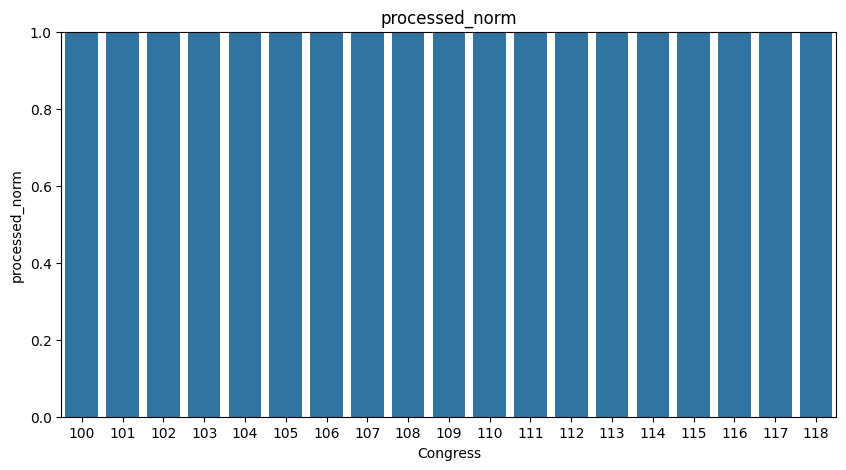

In [9]:
count_bar_plot(df, "processed_norm")

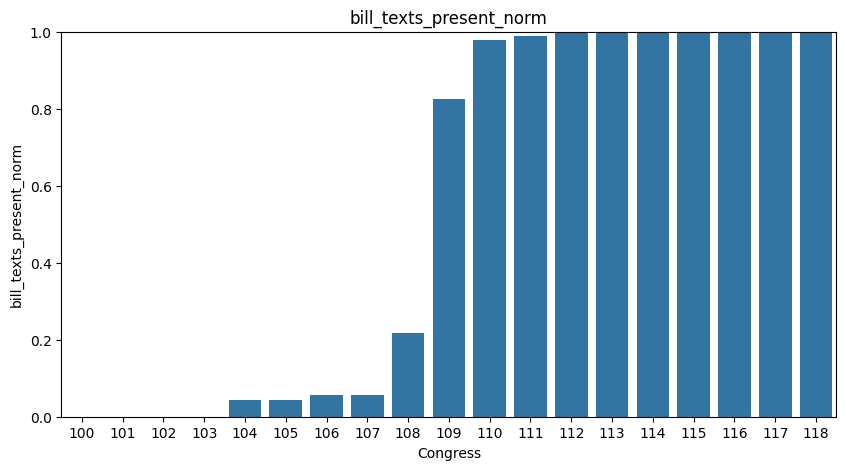

In [10]:
count_bar_plot(df, "bill_texts_present_norm")

In [11]:
frames = []
for path in detailed_bill_status_csv:
    df = pd.read_csv(path)
    frames.append(df)
detailed_bills_df = pd.concat(frames)

detailed_bills_df["text_formats"] = detailed_bills_df["text_formats"].apply(ast.literal_eval)

In [17]:
exploded = detailed_bills_df.explode("text_formats")
exploded[['type', 'format']] = pd.DataFrame(exploded['text_formats'].to_list(), index=exploded.index)
text_format_counts = exploded.groupby(["type", "format"]).agg(
    bill_count=("bill_number", "count"),
).reset_index()
text_format_counts

,type,format,bill_count
0,AS - Amendment Ordered to be Printed Senate,Formatted Text,3
1,AS - Amendment Ordered to be Printed Senate,PDF,3
2,Additional Sponsors House,Formatted Text,2
3,Additional Sponsors House,PDF,2
4,Agreed to House,Formatted Text,865
...,...,...,...
126,Returned to the House by Unanimous Consent,Formatted Text,3
127,Returned to the House by Unanimous Consent,Formatted XML,2
128,Returned to the House by Unanimous Consent,PDF,3
129,Sponsor Change,Formatted Text,5
